## Prepare the CIFAR DATASET :

## Question 1

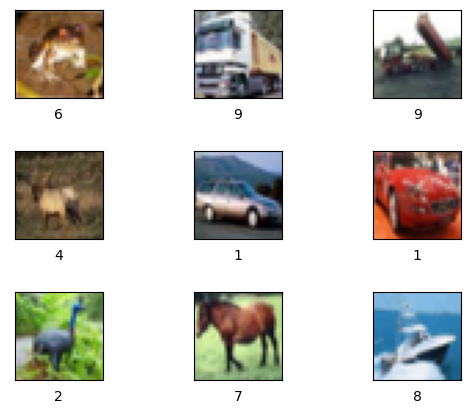

In [1]:
import pickle
import numpy as np
#Fonction Donnée sur le site de CIFAR
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
#Récupère les données et les normalise entre 0 et 1 pour l'affichage 
def read_cifar_batch(path_to_batch_file):
    dict=unpickle(path_to_batch_file)
    data=np.array(dict[b'data'],dtype=np.float32)/255
    labels=np.array(dict[b'labels'],dtype=np.int64)
    return data,labels
#Execute le code pour avoir les données pour la suite du jupyter notebook et affiche les images pour bien vérifier le fonctionnement
path="data/cifar-10-batches-py/data_batch_1"
import matplotlib.pyplot as plt
data,labels=read_cifar_batch(path)
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(3, 32, 32).transpose([1, 2, 0]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[i])
plt.show()


## Question 2


In [2]:
import glob 
def read_cifar(path_to_batches_files):
    files=glob.glob(f'{path_to_batches_files}/*_batch*')
    data,labels=read_cifar_batch(files[0])
    for i in range(1,len(files)):
        data_temp,labels_temp=read_cifar_batch(files[i])
        data=np.concatenate((data,data_temp),axis=0)
        labels=np.concatenate((labels,labels_temp),axis=0)
    return data,labels


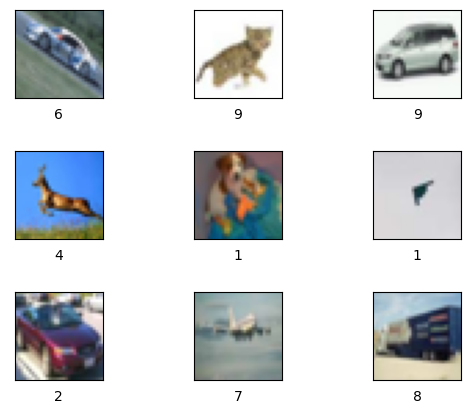

(60000, 3072) (60000,)


In [3]:
#Affiche 9 images alléatoires pour vérifier le bon fonctionnement de la fonction read_cifar
data,labels=read_cifar("data/cifar-10-batches-py")
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    k=np.random.randint(0,len(data))
    ax.imshow(data[k].reshape(3, 32, 32).transpose([1, 2, 0]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[i])
plt.show()
print(data.shape,labels.shape)


## Question 3 
### Split dataset


In [4]:
def split_data(data,labels,split=0.9):
    #shuffle
    index=np.arange(len(data))
    np.random.shuffle(index)
    data=data[index]
    labels=labels[index]
    #split
    split=int(len(data)*split)
    data_train=data[:split]
    labels_train=labels[:split]
    data_test=data[split:]
    labels_test=labels[split:]
    return data_train,labels_train,data_test,labels_test


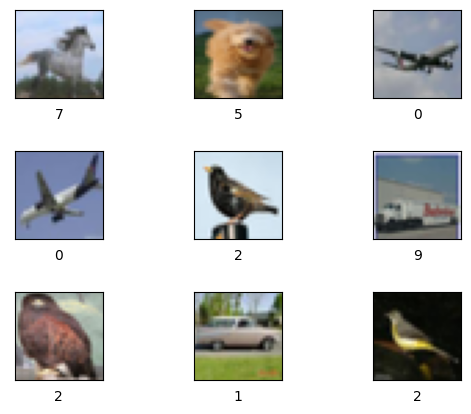

In [5]:
#Affiche les 9 dernières images du jeu de données d'entrainement pour vérifier le bon fonctionnement de la fonction split_data
data_train,labels_train,data_test,labels_test=split_data(data,labels)
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(data_train[-i].reshape(3, 32, 32).transpose([1, 2, 0]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels_train[-i])
plt.show()

## K-Nearest Neighbors


In [6]:
def distance_matrix(X: np.ndarray, Y: np.ndarray):
    # print(X.shape, Y.shape)
    x2 = np.sum(X**2, axis=1, keepdims=True)
    y2 = np.sum(Y**2, axis=1, keepdims=True)
    xy = X.dot(Y.T)
    return np.sqrt(x2 - 2 * xy + y2.T)



In [7]:
#Test distance_matrix function
a=np.array([[1,4],[-1,-2]])
b=np.array([[3,2],[3,4]])
print(distance_matrix(a,b))

[[2.82842712 2.        ]
 [5.65685425 7.21110255]]


In [8]:

def knn_predict(dists,labels_train,k):
    #Trie les distances
    index=np.argsort(dists)

    #Sélectionne les k plus proches
    k_nearest=index[:,:k]

    #Trie les labels correspondant aux k plus proches
    k_nearest_labels=labels_train[k_nearest]
    
    #Cherche le label le plus fréquent parmis les k plus proches
    labels=np.zeros(len(dists),dtype=np.int64)
    for i in range(len(dists)):
        labels[i]=np.argmax(np.bincount(k_nearest_labels[i]))
    return labels

In [9]:
def evaluate_knn(data_train,labels_train,data_test,labels_test,k):
    #Génère la matrice des distances
    dists=distance_matrix(data_test,data_train)
    
    #Prédit les labels
    knn_predict_labels=knn_predict(dists,labels_train,k)

    #Calcule la précision
    accuracy=np.mean(knn_predict_labels==labels_test)

    return accuracy

  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:42<13:28, 42.55s/it]

0.3626666666666667


 10%|█         | 2/20 [01:25<12:47, 42.66s/it]

0.31966666666666665


 15%|█▌        | 3/20 [02:07<12:04, 42.63s/it]

0.3408333333333333


 20%|██        | 4/20 [02:50<11:24, 42.75s/it]

0.3431666666666667


 25%|██▌       | 5/20 [03:28<10:16, 41.08s/it]

0.3505


 30%|███       | 6/20 [04:10<09:37, 41.26s/it]

0.3466666666666667


 35%|███▌      | 7/20 [04:51<08:53, 41.01s/it]

0.347


 40%|████      | 8/20 [05:32<08:13, 41.09s/it]

0.3461666666666667


 45%|████▌     | 9/20 [06:12<07:28, 40.78s/it]

0.3445


 50%|█████     | 10/20 [06:53<06:49, 40.96s/it]

0.3436666666666667


 55%|█████▌    | 11/20 [07:36<06:12, 41.42s/it]

0.3421666666666667


 60%|██████    | 12/20 [08:14<05:24, 40.61s/it]

0.3431666666666667


 65%|██████▌   | 13/20 [08:56<04:45, 40.85s/it]

0.33916666666666667


 70%|███████   | 14/20 [09:37<04:05, 40.92s/it]

0.3375


 75%|███████▌  | 15/20 [10:20<03:27, 41.57s/it]

0.3373333333333333


 80%|████████  | 16/20 [11:02<02:47, 41.81s/it]

0.3375


 85%|████████▌ | 17/20 [11:45<02:06, 42.20s/it]

0.33816666666666667


 90%|█████████ | 18/20 [12:27<01:24, 42.04s/it]

0.338


 95%|█████████▌| 19/20 [13:11<00:42, 42.66s/it]

0.3348333333333333


100%|██████████| 20/20 [13:53<00:00, 41.66s/it]

0.3373333333333333


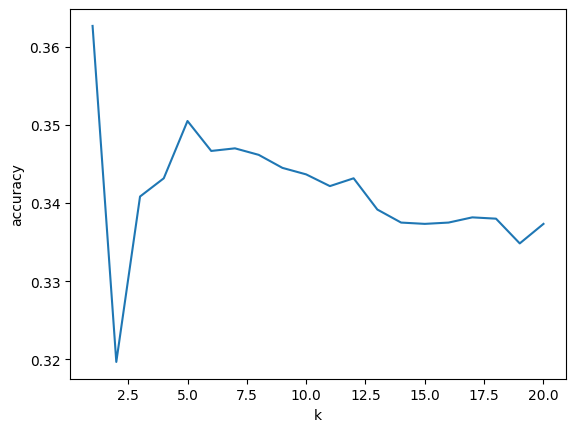

In [10]:
#Test for k=1 to 20 and plot the accuracy
from tqdm import tqdm
accuracy=[]
for k in  tqdm(range(1,21)):
    accuracy.append(evaluate_knn(data_train,labels_train,data_test,labels_test,k))
    print(accuracy[-1])
plt.plot(np.arange(1,21),accuracy)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

## Neural Network

In [ ]:
#Code donné dans l'énoncé

import numpy as np

N = 30  # number of input data
d_in = 3  # input dimension
d_h = 3  # number of neurons in the hidden layer
d_out = 2  # output dimension (number of neurons of the output layer)

# Random initialization of the network weights and biaises
w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
b1 = np.zeros((1, d_h))  # first layer biaises
w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
b2 = np.zeros((1, d_out))  # second layer biaises

data = np.random.rand(N, d_in)  # create a random data
targets = np.random.rand(N, d_out)  # create a random targets

# Forward pass
a0 = data # the data are the input of the first layer
z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
z2 = np.matmul(a1, w2) + b2  # input of the output layer
a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
predictions = a2  # the predicted values are the outputs of the output layer

# Compute loss (MSE)
loss = np.mean(np.square(predictions - targets))
#print(loss)


In [12]:
def learn_once_mse(w1,b1,w2,b2,data,targets,learning_rate):
    #Function returning the updated weights and biased after one learning step and the loss
    #Forward pass

    a0=data # the data are the input of the first layer 
    z1=np.matmul(a0,w1)+b1 # input of the hidden layer
    a1=1/(1+np.exp(-z1)) # output of the hidden layer (sigmoid activation function)
    z2=np.matmul(a1,w2)+b2 # input of the output layer
    a2=1/(1+np.exp(-z2)) # output of the output layer (sigmoid activation function)
    predictions=a2 # the predicted values are the outputs of the output layer
    
    #Compute loss (MSE)
    loss=np.mean(np.square(predictions-targets))
    #Backward pass
    #Compute gradients according to the formula calculated
    grad_a2=2*(predictions-targets)
    grad_z2=grad_a2*a2*(1-a2) 
    grad_w2=np.matmul(a1.T,grad_z2) 
    grad_b2=np.sum(grad_z2,axis=0) 
    grad_a1=np.matmul(grad_z2,w2.T)
    grad_z1=grad_a1*a1*(1-a1) 
    grad_w1=np.matmul(a0.T,grad_z1) 
    grad_b1=np.sum(grad_z1,axis=0) 

    #Update weights and biaises
    w1=w1-learning_rate*grad_w1
    w2=w2-learning_rate*grad_w2
    b1=b1-learning_rate*grad_b1
    b2=b2-learning_rate*grad_b2
    return w1,b1,w2,b2,loss

In [13]:
def one_hot(labels):
    #print(labels)
    if type(labels)==np.int64:
        labels=np.array([labels])
    res=np.zeros((len(labels),9+1))
    res[np.arange(len(labels)),labels]=1
    return res
#a=np.array([1,2,0])
#one_hot(a)

In [14]:
import scipy.special as sp
def learn_once_cross_entropy(w1,b1,w2,b2,data,targets,learning_rate,batch_size):
    a0=data # the data are the input of the first layer 
    z1=np.matmul(a0,w1)+b1 # input of the hidden layer
    a1=1/(1+np.exp(-z1)) # output of the hidden layer (sigmoid activation function)
    z2=np.matmul(a1,w2)+b2 # input of the output layer
    a2=sp.softmax(z2,axis=1) # output of the output layer (sigmoid activation function)
    predictions=a2 # the predicted values are the outputs of the output layer   
    #Compute loss (MSE)
    predi=a2.argmax(axis=1)
    c=0
    for i in range (len(predi)):
        if predi[i]==targets[i]:
            c+=1
    targets=one_hot(targets)
    
    loss=-np.sum(targets*np.log(predictions+1e-8))/batch_size
    grad_z2=(predictions-targets)/batch_size
    grad_w2=np.matmul(a1.T,grad_z2) 
    grad_b2=np.sum(grad_z2,axis=0)
    grad_a1=np.matmul(grad_z2,w2.T) 
    grad_z1=grad_a1*a1*(1-a1)
    a0=a0.reshape(-1,batch_size) #reshape data because a0 was (batch_size,) and we wanted (batch_size,1)
    grad_w1=np.matmul(a0,grad_z1)
    grad_b1=np.sum(grad_z1,axis=0) 
    #Update weights and biaises
    w1=w1-learning_rate*grad_w1
    w2=w2-learning_rate*grad_w2
    b1=b1-learning_rate*grad_b1
    b2=b2-learning_rate*grad_b2
    #print("Gradients",grad_w1,grad_w2,grad_b1,grad_b2)
    return w1,b1,w2,b2,c/len(predi)

In [15]:
from tqdm import tqdm
def train_mlp(w1,b1,w2,b2,data_train,labels_train,learning_rate=0.01,nb_epochs=100,batch_size=1):
    train_accuracies=[]
    for i in range(nb_epochs):
        losses=[]
        for j in tqdm(range(int(len(data_train)/batch_size))):
            w1,b1,w2,b2,loss=learn_once_cross_entropy(w1,b1,w2,b2,data_train[j*batch_size:(j+1)*batch_size],labels_train[j*batch_size:(j+1)*batch_size],learning_rate,batch_size)
            losses.append(loss)
        if len(data_train)%batch_size!=0:
            w1,b1,w2,b2,loss=learn_once_cross_entropy(w1,b1,w2,b2,data_train[j*batch_size:],labels_train[j*batch_size:],learning_rate,len(data_train)%batch_size)
            losses.append(loss)
        print(f"epoch {i} : loss {sum(losses)/len(losses)}")
        train_accuracies.append(sum(losses)/len(losses))
    return w1,b1,w2,b2,train_accuracies

In [16]:
def test_mlp(w1,b1,w2,b2,data_test,labels_test):
    a0=data_test # the data are the input of the first layer 
    z1=np.matmul(a0,w1)+b1 # input of the hidden layer
    a1=1/(1+np.exp(-z1)) # output of the hidden layer (sigmoid activation function)
    z2=np.matmul(a1,w2)+b2 # input of the output layer
    a2=sp.softmax(z2) # output of the output layer (sigmoid activation function)
    predictions=a2 # the predicted values are the outputs of the output layer   
    #Compute loss (MSE)
    c=0
    index_predic=a2.argmax(axis=1)
    for i in range(len(index_predic)):
        if index_predic[i]==labels_test[i]:
            c+=1
    return c/len(index_predic)

In [17]:
def run_mlp_training(data_train,labels_train,data_test,labels_test,dh,learning_rate=0.1,nb_epochs=100,batch_size=200):
    #Initialization of the network weights and biaises
    w1=2*np.random.rand(3072,dh)-1 # first layer weights
    b1=np.zeros((1,dh)) # first layer biaises
    w2=2*np.random.rand(dh,10)-1 # second layer weights
    b2=np.zeros((1,10)) # second layer biaises
    #Training
    w1,b1,w2,b2,train_accuracies=train_mlp(w1,b1,w2,b2,data_train,labels_train,learning_rate,nb_epochs,batch_size)
    #Test
    test_accuracy=test_mlp(w1,b1,w2,b2,data_test,labels_test)
    print(test_accuracy)
    return train_accuracies,test_accuracy

In [18]:
print(labels_train)


[7 0 9 ... 0 0 5]


100%|██████████| 540/540 [00:04<00:00, 134.87it/s]


epoch 0 : loss 0.18964814814814823


100%|██████████| 540/540 [00:03<00:00, 138.29it/s]


epoch 1 : loss 0.2174259259259259


100%|██████████| 540/540 [00:03<00:00, 141.53it/s]


epoch 2 : loss 0.22690740740740722


100%|██████████| 540/540 [00:03<00:00, 150.78it/s]


epoch 3 : loss 0.23453703703703718


100%|██████████| 540/540 [00:03<00:00, 150.23it/s]


epoch 4 : loss 0.2388518518518518


100%|██████████| 540/540 [00:03<00:00, 149.73it/s]


epoch 5 : loss 0.24214814814814808


100%|██████████| 540/540 [00:03<00:00, 150.31it/s]


epoch 6 : loss 0.24359259259259236


100%|██████████| 540/540 [00:03<00:00, 151.41it/s]


epoch 7 : loss 0.24588888888888863


100%|██████████| 540/540 [00:03<00:00, 148.59it/s]


epoch 8 : loss 0.2489259259259257


100%|██████████| 540/540 [00:03<00:00, 149.16it/s]


epoch 9 : loss 0.25020370370370354


100%|██████████| 540/540 [00:03<00:00, 149.64it/s]


epoch 10 : loss 0.25198148148148153


100%|██████████| 540/540 [00:03<00:00, 151.10it/s]


epoch 11 : loss 0.25494444444444425


100%|██████████| 540/540 [00:03<00:00, 148.15it/s]


epoch 12 : loss 0.2580740740740739


100%|██████████| 540/540 [00:03<00:00, 150.48it/s]


epoch 13 : loss 0.2597962962962961


100%|██████████| 540/540 [00:03<00:00, 149.80it/s]


epoch 14 : loss 0.2595185185185187


100%|██████████| 540/540 [00:03<00:00, 151.46it/s]


epoch 15 : loss 0.2608703703703703


100%|██████████| 540/540 [00:03<00:00, 150.11it/s]


epoch 16 : loss 0.26214814814814813


100%|██████████| 540/540 [00:03<00:00, 152.06it/s]


epoch 17 : loss 0.2621111111111109


100%|██████████| 540/540 [00:03<00:00, 150.35it/s]


epoch 18 : loss 0.26185185185185156


100%|██████████| 540/540 [00:03<00:00, 149.66it/s]


epoch 19 : loss 0.26168518518518524


100%|██████████| 540/540 [00:03<00:00, 144.42it/s]


epoch 20 : loss 0.2620555555555556


100%|██████████| 540/540 [00:03<00:00, 149.92it/s]


epoch 21 : loss 0.2621111111111113


100%|██████████| 540/540 [00:03<00:00, 150.83it/s]


epoch 22 : loss 0.26209259259259243


100%|██████████| 540/540 [00:03<00:00, 148.68it/s]


epoch 23 : loss 0.26327777777777783


100%|██████████| 540/540 [00:03<00:00, 150.85it/s]


epoch 24 : loss 0.2654074074074075


100%|██████████| 540/540 [00:03<00:00, 151.33it/s]


epoch 25 : loss 0.26614814814814797


100%|██████████| 540/540 [00:03<00:00, 146.77it/s]


epoch 26 : loss 0.2670740740740739


100%|██████████| 540/540 [00:03<00:00, 151.29it/s]


epoch 27 : loss 0.2675000000000002


100%|██████████| 540/540 [00:03<00:00, 144.77it/s]


epoch 28 : loss 0.267425925925926


100%|██████████| 540/540 [00:04<00:00, 108.82it/s]


epoch 29 : loss 0.2674814814814816


100%|██████████| 540/540 [00:04<00:00, 116.84it/s]


epoch 30 : loss 0.2667777777777776


100%|██████████| 540/540 [00:04<00:00, 128.88it/s]


epoch 31 : loss 0.26794444444444443


100%|██████████| 540/540 [00:04<00:00, 128.01it/s]


epoch 32 : loss 0.2688888888888893


100%|██████████| 540/540 [00:04<00:00, 121.31it/s]


epoch 33 : loss 0.268962962962963


100%|██████████| 540/540 [00:04<00:00, 127.53it/s]


epoch 34 : loss 0.2691481481481483


100%|██████████| 540/540 [00:04<00:00, 125.08it/s]


epoch 35 : loss 0.26992592592592596


100%|██████████| 540/540 [00:04<00:00, 126.87it/s]


epoch 36 : loss 0.2715925925925927


100%|██████████| 540/540 [00:04<00:00, 121.81it/s]


epoch 37 : loss 0.27188888888888907


100%|██████████| 540/540 [00:04<00:00, 128.03it/s]


epoch 38 : loss 0.2715740740740743


100%|██████████| 540/540 [00:04<00:00, 125.44it/s]


epoch 39 : loss 0.27159259259259266


100%|██████████| 540/540 [00:03<00:00, 136.98it/s]


epoch 40 : loss 0.27149999999999985


100%|██████████| 540/540 [00:03<00:00, 143.89it/s]


epoch 41 : loss 0.27105555555555566


100%|██████████| 540/540 [00:03<00:00, 141.13it/s]


epoch 42 : loss 0.27029629629629603


100%|██████████| 540/540 [00:04<00:00, 134.34it/s]


epoch 43 : loss 0.2700185185185186


100%|██████████| 540/540 [00:03<00:00, 136.73it/s]


epoch 44 : loss 0.2716851851851854


100%|██████████| 540/540 [00:03<00:00, 135.67it/s]


epoch 45 : loss 0.2707037037037038


100%|██████████| 540/540 [00:03<00:00, 140.36it/s]


epoch 46 : loss 0.2708148148148152


100%|██████████| 540/540 [00:03<00:00, 138.36it/s]


epoch 47 : loss 0.27112962962962994


100%|██████████| 540/540 [00:03<00:00, 136.64it/s]


epoch 48 : loss 0.27125925925925937


100%|██████████| 540/540 [00:03<00:00, 139.43it/s]


epoch 49 : loss 0.2712592592592595


100%|██████████| 540/540 [00:03<00:00, 138.83it/s]


epoch 50 : loss 0.27150000000000013


100%|██████████| 540/540 [00:03<00:00, 137.53it/s]


epoch 51 : loss 0.2711296296296296


100%|██████████| 540/540 [00:04<00:00, 131.50it/s]


epoch 52 : loss 0.2715740740740743


100%|██████████| 540/540 [00:03<00:00, 135.73it/s]


epoch 53 : loss 0.2724259259259262


100%|██████████| 540/540 [00:03<00:00, 138.76it/s]


epoch 54 : loss 0.2724814814814815


100%|██████████| 540/540 [00:03<00:00, 139.82it/s]


epoch 55 : loss 0.272148148148148


100%|██████████| 540/540 [00:03<00:00, 138.31it/s]


epoch 56 : loss 0.27007407407407397


100%|██████████| 540/540 [00:04<00:00, 133.62it/s]


epoch 57 : loss 0.2726111111111109


100%|██████████| 540/540 [00:04<00:00, 134.87it/s]


epoch 58 : loss 0.27355555555555566


100%|██████████| 540/540 [00:04<00:00, 134.48it/s]


epoch 59 : loss 0.27572222222222237


100%|██████████| 540/540 [00:03<00:00, 136.84it/s]


epoch 60 : loss 0.2749259259259258


100%|██████████| 540/540 [00:03<00:00, 139.17it/s]


epoch 61 : loss 0.2740555555555557


100%|██████████| 540/540 [00:03<00:00, 136.86it/s]


epoch 62 : loss 0.27425925925925954


100%|██████████| 540/540 [00:03<00:00, 139.06it/s]


epoch 63 : loss 0.274166666666667


100%|██████████| 540/540 [00:03<00:00, 139.48it/s]


epoch 64 : loss 0.2742222222222226


100%|██████████| 540/540 [00:03<00:00, 141.48it/s]


epoch 65 : loss 0.2745925925925927


100%|██████████| 540/540 [00:03<00:00, 138.18it/s]


epoch 66 : loss 0.27409259259259255


100%|██████████| 540/540 [00:03<00:00, 140.89it/s]


epoch 67 : loss 0.2738703703703705


100%|██████████| 540/540 [00:03<00:00, 138.07it/s]


epoch 68 : loss 0.2739444444444446


100%|██████████| 540/540 [00:03<00:00, 135.79it/s]


epoch 69 : loss 0.27414814814814825


100%|██████████| 540/540 [00:03<00:00, 136.78it/s]


epoch 70 : loss 0.2739814814814815


100%|██████████| 540/540 [00:03<00:00, 141.45it/s]


epoch 71 : loss 0.2734074074074077


100%|██████████| 540/540 [00:03<00:00, 140.29it/s]


epoch 72 : loss 0.27316666666666695


100%|██████████| 540/540 [00:03<00:00, 139.74it/s]


epoch 73 : loss 0.2731851851851854


100%|██████████| 540/540 [00:03<00:00, 136.14it/s]


epoch 74 : loss 0.27340740740740765


100%|██████████| 540/540 [00:03<00:00, 138.52it/s]


epoch 75 : loss 0.2726296296296299


100%|██████████| 540/540 [00:04<00:00, 134.81it/s]


epoch 76 : loss 0.27292592592592607


100%|██████████| 540/540 [00:03<00:00, 140.05it/s]


epoch 77 : loss 0.273037037037037


100%|██████████| 540/540 [00:03<00:00, 139.42it/s]


epoch 78 : loss 0.27290740740740754


100%|██████████| 540/540 [00:03<00:00, 140.30it/s]


epoch 79 : loss 0.273314814814815


100%|██████████| 540/540 [00:03<00:00, 141.11it/s]


epoch 80 : loss 0.2731851851851851


100%|██████████| 540/540 [00:03<00:00, 141.73it/s]


epoch 81 : loss 0.27266666666666656


100%|██████████| 540/540 [00:03<00:00, 139.88it/s]


epoch 82 : loss 0.2719074074074077


100%|██████████| 540/540 [00:03<00:00, 136.71it/s]


epoch 83 : loss 0.27133333333333337


100%|██████████| 540/540 [00:03<00:00, 138.19it/s]


epoch 84 : loss 0.2709814814814815


100%|██████████| 540/540 [00:04<00:00, 134.74it/s]


epoch 85 : loss 0.2712777777777778


100%|██████████| 540/540 [00:03<00:00, 145.86it/s]


epoch 86 : loss 0.2715925925925927


100%|██████████| 540/540 [00:03<00:00, 139.02it/s]


epoch 87 : loss 0.27168518518518514


100%|██████████| 540/540 [00:03<00:00, 138.87it/s]


epoch 88 : loss 0.27111111111111097


100%|██████████| 540/540 [00:03<00:00, 145.13it/s]


epoch 89 : loss 0.270796296296296


100%|██████████| 540/540 [00:03<00:00, 139.78it/s]


epoch 90 : loss 0.2703333333333335


100%|██████████| 540/540 [00:03<00:00, 137.62it/s]


epoch 91 : loss 0.2705000000000001


100%|██████████| 540/540 [00:03<00:00, 139.15it/s]


epoch 92 : loss 0.2708518518518516


100%|██████████| 540/540 [00:03<00:00, 139.45it/s]


epoch 93 : loss 0.270462962962963


100%|██████████| 540/540 [00:03<00:00, 140.91it/s]


epoch 94 : loss 0.27031481481481473


100%|██████████| 540/540 [00:04<00:00, 116.50it/s]


epoch 95 : loss 0.2708148148148152


100%|██████████| 540/540 [00:04<00:00, 110.82it/s]


epoch 96 : loss 0.27033333333333326


100%|██████████| 540/540 [00:04<00:00, 125.50it/s]


epoch 97 : loss 0.2714814814814816


100%|██████████| 540/540 [00:04<00:00, 132.80it/s]


epoch 98 : loss 0.2733518518518521


100%|██████████| 540/540 [00:03<00:00, 139.40it/s]


epoch 99 : loss 0.2742407407407412
0.268


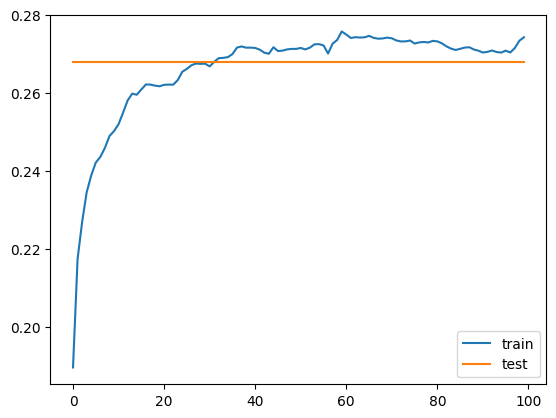

In [19]:
#print(data.shape,w1.shape,b1.shape,w2.shape,b2.shape)
#print(data_train.shape,labels_train.shape)
    
train_accuracies,test_accuracy=run_mlp_training(data_train,labels_train,data_test,labels_test,64,0.1,100,100)
plt.plot(train_accuracies,label="train")
test_accuracies=[test_accuracy for i in range(len(train_accuracies))]
plt.plot(test_accuracies,label="test")
plt.legend()
plt.show()


In [20]:
def merge_data(data_train,data_test_labels_train,labels_test):
    data=np.concatenate((data_train,data_test),axis=0)
    labels=np.concatenate((labels_train,labels_test),axis=0)
    return data,labels

In [21]:
def shuffle_data(data,labels):
    index=np.arange(len(data))
    np.random.shuffle(index)
    data=data[index]
    labels=labels[index]
    return data,labels

In [22]:


def fold_cross_validation(N,data_train,labels_train,data_test,labels_test,dh,learning_rate=0.1,nb_epochs=100,batch_size=200):
    data,labels=merge_data(data_train,data_test,labels_train,labels_test)
    data,labels=shuffle_data(data,labels)
    for i in range (N):
        pass


In [23]:
import torch
torch.cuda.is_available()

ModuleNotFoundError: No module named 'torch'